Testing colorization_model.h5...
1/1 ━━━━━━━━━━━━━━━━━━━━ 35s 35s/step


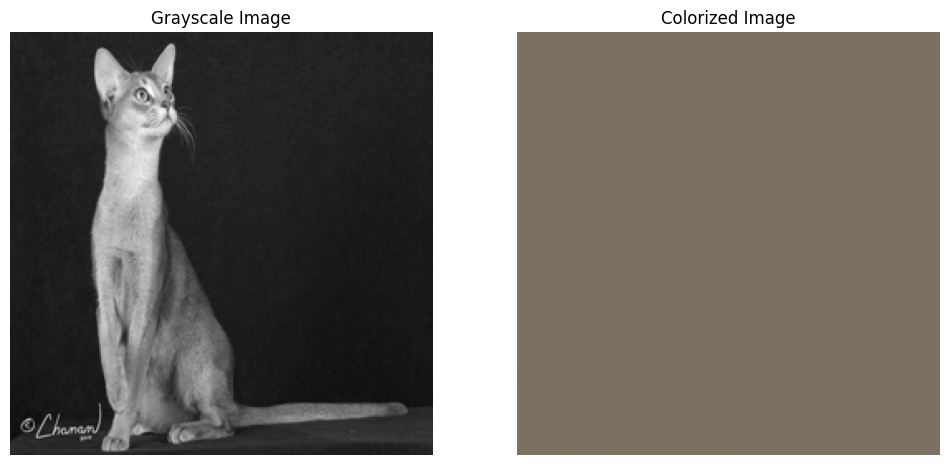

Testing colorization_model_Adam.h5...
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step


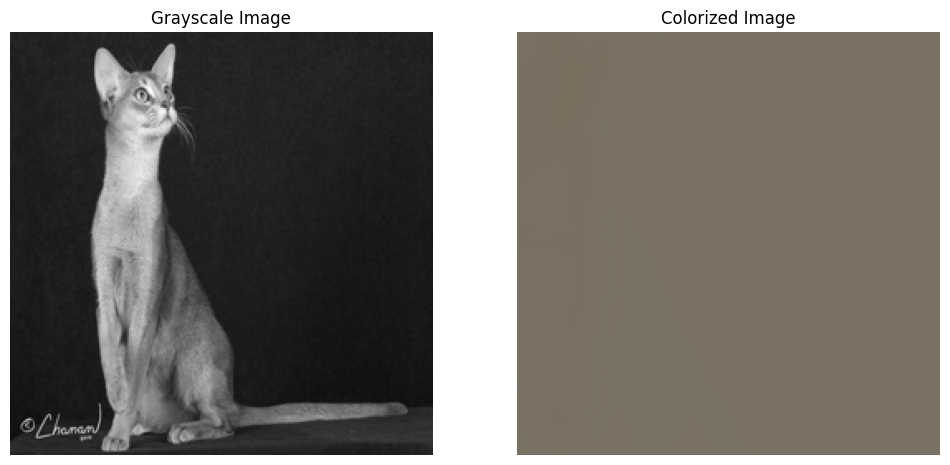

Testing colorization_model_bce.h5...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step


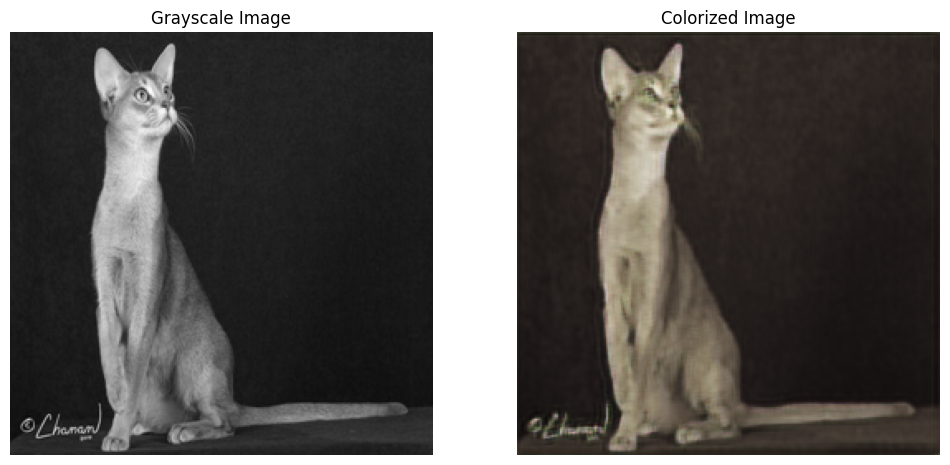

Testing colorization_model_bce_Adam.h5...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step


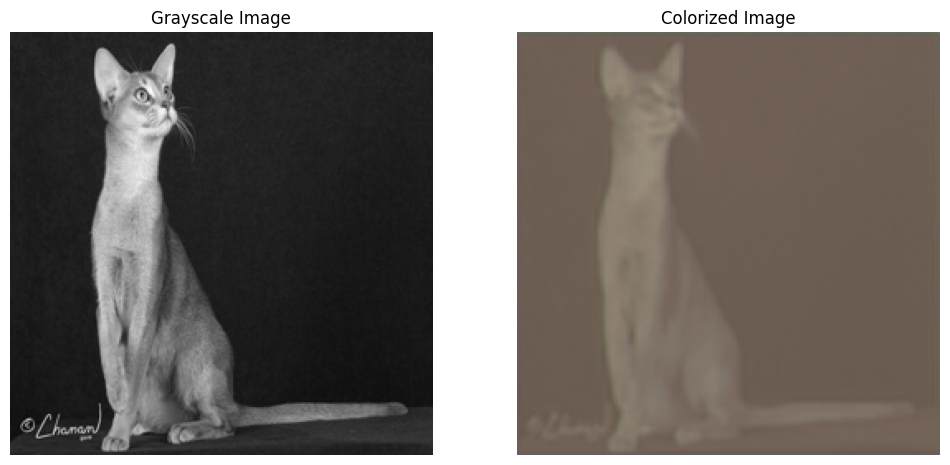

Testing colorization_model_bce_RMSprop.h5...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step


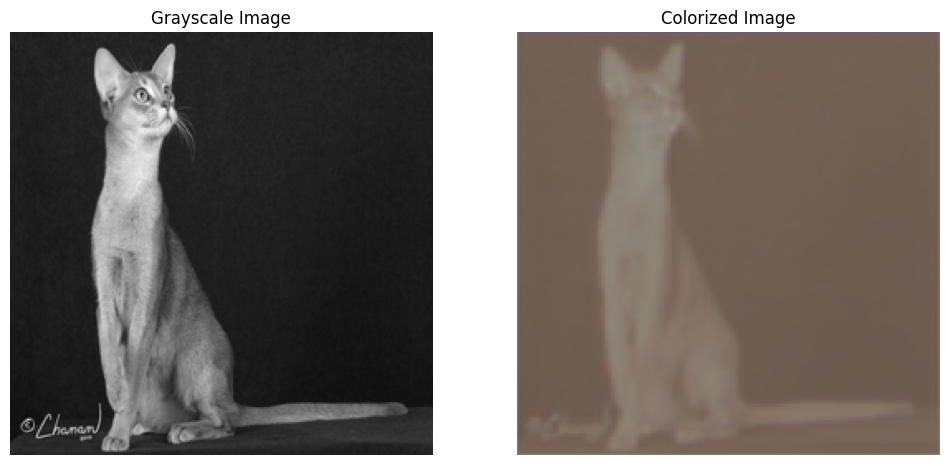

Testing colorization_model_bce_SGD.h5...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


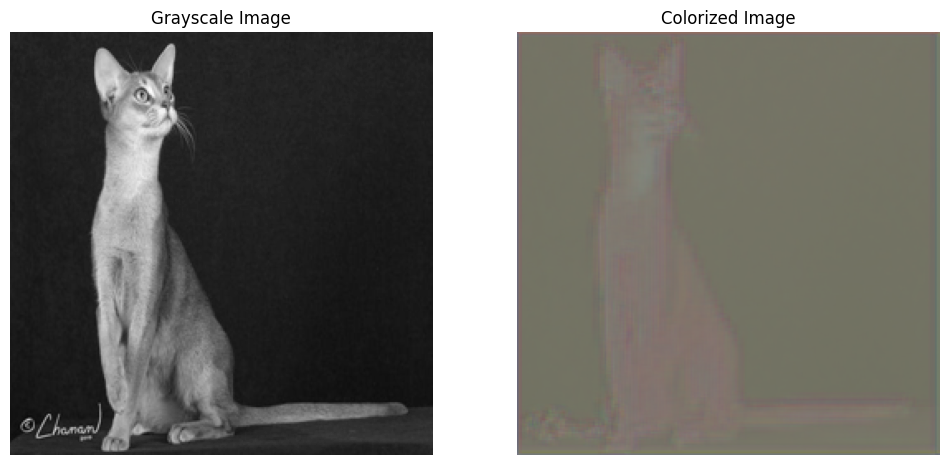

Error loading colorization_model_mae.h5: Could not locate function 'mae'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mae', 'registered_name': 'mae'}. Skipping to next model.
Error loading colorization_model_mse.h5: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}. Skipping to next model.


Testing colorization_model_RMSprop.h5...
1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step


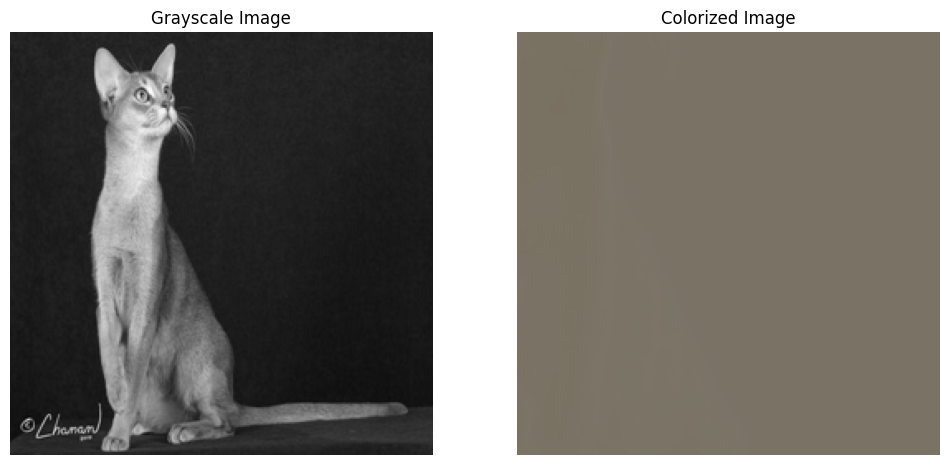

Testing colorization_model_SGD.h5...
1/1 ━━━━━━━━━━━━━━━━━━━━ 37s 37s/step


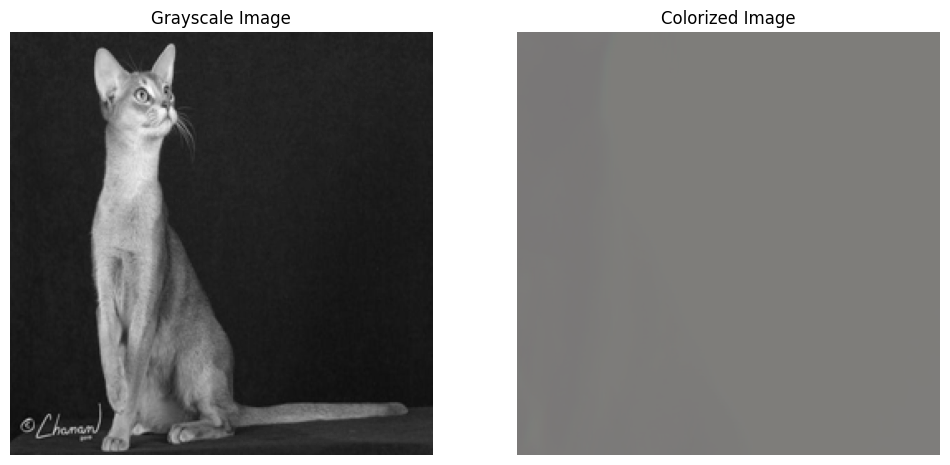

In [6]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Function to load and resize an image
def load_and_resize_image(image_path, target_size=(256, 256)):
    image = Image.open(image_path)  # Load the image
    resized_image = image.resize(target_size)  # Resize the image
    return resized_image

# Function to visualize colorization
def visualize_colorization(model, grayscale_image_path, transform, target_size=(256, 256)):
    # Load and resize grayscale image
    grayscale_image = load_and_resize_image(grayscale_image_path, target_size)

    # Convert to array and normalize
    grayscale_tensor = transform(grayscale_image) / 255.0  # Normalize to [0, 1]
    grayscale_tensor = np.expand_dims(grayscale_tensor, axis=0)  # Add batch dimension

    # Predict the colorized image
    try:
        colorized_tensor = model.predict(grayscale_tensor)
        colorized_image = colorized_tensor.squeeze(0)  # Remove batch dimension

        # Plot grayscale and colorized images side by side
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        ax[0].imshow(grayscale_image, cmap='gray')
        ax[0].set_title('Grayscale Image')
        ax[0].axis('off')

        ax[1].imshow(colorized_image)
        ax[1].set_title('Colorized Image')
        ax[1].axis('off')

        plt.show()
    except Exception as e:
        print(f"Error with model {model.name}: {e}. Skipping to next model.")

# Path to your grayscale image
grayscale_image_path = 'cv_p3_images_split/validation/grayscale/Bengal_111.jpg'

# The transformation function to convert image to array
transform = tf.keras.preprocessing.image.img_to_array

# Load and test all models from the 'models' folder
models_folder = 'models'
model_files = [f for f in os.listdir(models_folder) if f.endswith('.h5')]

for model_file in model_files:
    model_path = os.path.join(models_folder, model_file)
    try:
        # Load the model
        model = load_model(model_path)
        print(f'Testing {model_file}...')
        
        # Visualize colorization
        visualize_colorization(model, grayscale_image_path, transform)
    
    except Exception as e:
        print(f"Error loading {model_file}: {e}. Skipping to next model.")
